<a href="https://www.kaggle.com/code/mohamedraddwan/stock-market-comparisons?scriptVersionId=248368241" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-june-2025-dataset/stock_market_june2025.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [ ]:
Stock_market = pd.read_csv('/kaggle/input/stock-market-june-2025-dataset/stock_market_june2025.csv')

In [ ]:
Stock_market.head()

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0  01-06-2025    SLH       34.92        34.53       35.22      34.38   
1  01-06-2025    WGB      206.50       208.45      210.51     205.12   
2  01-06-2025    ZIN      125.10       124.03      127.40     121.77   
3  01-06-2025    YPY      260.55       265.28      269.99     256.64   
4  01-06-2025    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [ ]:
Stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


In [ ]:
Stock_market.describe().T

count          mean           std           min  \
Open Price      1762.0  1.575004e+02  8.204305e+01  1.502000e+01   
Close Price     1762.0  1.575671e+02  8.222745e+01  1.477000e+01   
High Price      1762.0  1.604233e+02  8.362656e+01  1.512000e+01   
Low Price       1762.0  1.547040e+02  8.064707e+01  1.448000e+01   
Volume Traded   1762.0  8.075851e+06  5.104890e+06  5.007270e+05   
Market Cap      1762.0  6.520977e+10  1.467168e+11  1.290761e+09   
PE Ratio        1762.0  2.314386e+01  7.498239e+00  8.020000e+00   
Dividend Yield  1762.0  2.337327e+00  1.124037e+00  1.000000e-02   
EPS             1762.0  7.663621e+00  5.202411e+00  4.700000e-01   
52 Week High    1762.0  1.890094e+02  9.908229e+01  1.703000e+01   
52 Week Low     1762.0  1.259646e+02  6.776728e+01  1.001000e+01   

                         25%           50%           75%           max  
Open Price      8.659250e+01  1.556750e+02  2.272075e+02  4.344000e+02  
Close Price     8.705500e+01  1.556750e+02  2.279025e+02  4.474300e+02  
High Price      8.848750e+01  1.588200e+02  2.316275e+02  4.538600e+02  
Low Price       8.538000e+01  1.527250e+02  2.231025e+02  4.315000e+02  
Volume Traded   4.268123e+06  7.911528e+06  1.160026e+07  6.537774e+07  
Market Cap      2.717406e+10  5.135322e+10  7.623076e+10  3.481112e+12  
PE Ratio        1.699750e+01  2.262000e+01  2.897750e+01  4.489000e+01  
Dividend Yield  1.450000e+00  2.330000e+00  3.127500e+00  5.000000e+00  
EPS             3.745000e+00  6.790000e+00  1.035000e+01  5.410000e+01  
52 Week High    1.046875e+02  1.854250e+02  2.719200e+02  5.715700e+02  
52 Week Low     6.666250e+01  1.230400e+02  1.798250e+02  3.455300e+02

In [ ]:
Stock_market.describe(include='object')

Date Ticker     Sector
count         1762   1762       1762
unique          21   1691         11
top     04-06-2025    OUF  Materials
freq            98      2        170

In [ ]:
# Making the format stable
Stock_market['Date'] = pd.to_datetime(
    Stock_market['Date'], 
    format='%d-%m-%Y'
)

In [ ]:
Stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1762 non-null   datetime64[ns]
 1   Ticker          1762 non-null   object        
 2   Open Price      1762 non-null   float64       
 3   Close Price     1762 non-null   float64       
 4   High Price      1762 non-null   float64       
 5   Low Price       1762 non-null   float64       
 6   Volume Traded   1762 non-null   int64         
 7   Market Cap      1762 non-null   float64       
 8   PE Ratio        1762 non-null   float64       
 9   Dividend Yield  1762 non-null   float64       
 10  EPS             1762 non-null   float64       
 11  52 Week High    1762 non-null   float64       
 12  52 Week Low     1762 non-null   float64       
 13  Sector          1762 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
m

In [ ]:
Stock_market['Date'].unique()

<DatetimeArray>
['2025-06-01 00:00:00', '2025-06-02 00:00:00', '2025-06-03 00:00:00',
 '2025-06-04 00:00:00', '2025-06-05 00:00:00', '2025-06-06 00:00:00',
 '2025-06-07 00:00:00', '2025-06-08 00:00:00', '2025-06-09 00:00:00',
 '2025-06-10 00:00:00', '2025-06-11 00:00:00', '2025-06-12 00:00:00',
 '2025-06-13 00:00:00', '2025-06-14 00:00:00', '2025-06-15 00:00:00',
 '2025-06-16 00:00:00', '2025-06-17 00:00:00', '2025-06-18 00:00:00',
 '2025-06-19 00:00:00', '2025-06-20 00:00:00', '2025-06-21 00:00:00']
Length: 21, dtype: datetime64[ns]

In [ ]:
df = Stock_market

In [ ]:
df.head()

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0 2025-06-01    SLH       34.92        34.53       35.22      34.38   
1 2025-06-01    WGB      206.50       208.45      210.51     205.12   
2 2025-06-01    ZIN      125.10       124.03      127.40     121.77   
3 2025-06-01    YPY      260.55       265.28      269.99     256.64   
4 2025-06-01    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [ ]:
df.isna().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0 2025-06-01    SLH       34.92        34.53       35.22      34.38   
1 2025-06-01    WGB      206.50       208.45      210.51     205.12   
2 2025-06-01    ZIN      125.10       124.03      127.40     121.77   
3 2025-06-01    YPY      260.55       265.28      269.99     256.64   
4 2025-06-01    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [ ]:
df.dtypes.value_counts()

float64           10
object             2
datetime64[ns]     1
int64              1
Name: count, dtype: int64

In [ ]:
df.shape

(1762, 14)

## What is the EPS (Earnings Per Share) For each Market within each industry sector  

In [ ]:
df_top_tickers = df[['Ticker','EPS']].sort_values('EPS',ascending=False).head(5)
df_top_tickers

Ticker    EPS
1303  BRK.B  54.10
683     WGK  31.10
1025    PHM  30.26
1421    HQZ  29.25
1448    QYG  29.24

In [ ]:
df_grouped_top_tickers = df.groupby('Ticker')['EPS'].mean().sort_values(ascending=False).head(5)
df_grouped_top_tickers

Ticker
BRK.B    54.10
WGK      31.10
PHM      30.26
HQZ      29.25
QYG      29.24
Name: EPS, dtype: float64

In [ ]:
# Group by Sector (assuming your column is named 'Sector' or similar)
df_EPS_grouped_industries = df.groupby('Sector')['EPS'].mean().sort_values(ascending=False).reset_index()

print(df_EPS_grouped_industries)

                    Sector        EPS
0                   Energy  13.465864
1                Utilities   8.162424
2               Financials   7.945476
3               Healthcare   7.432036
4   Communication Services   7.231688
5                Materials   7.115706
6              Industrials   7.042229
7              Real Estate   7.016490
8         Consumer Staples   6.881379
9   Consumer Discretionary   6.634528
10              Technology   5.125806


In [ ]:
PE_Ratio_grouped_industries = df.groupby('Sector')['PE Ratio'].mean().sort_values(ascending=False).reset_index()
PE_Ratio_grouped_industries

Sector   PE Ratio
0               Technology  32.095742
1              Real Estate  24.210000
2   Consumer Discretionary  24.175912
3         Consumer Staples  24.174759
4   Communication Services  24.015195
5                Materials  23.714882
6               Healthcare  23.600060
7              Industrials  23.367831
8               Financials  23.058750
9                Utilities  19.996909
10                  Energy  12.815556

In [ ]:
profile = ProfileReport(df, title="My Stock Market Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 78.39it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Who’s Leading in Earnings Per Share?

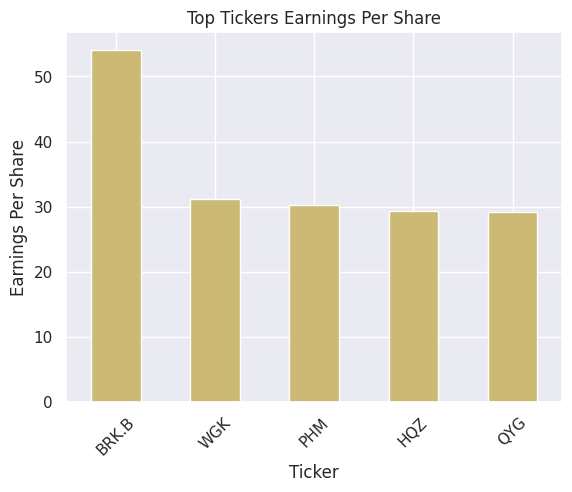

In [ ]:
# Pandas Plotting
df_grouped_top_tickers.plot(kind='bar', legend=False,color='y')
plt.title('Top Tickers Earnings Per Share')
plt.xlabel('Ticker')
plt.ylabel('Earnings Per Share')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_Tickers = df_grouped_top_tickers.index[[0,1,2,3,4]]
df_top_5_Tickers = df[df['Ticker'].isin(df_Tickers)]
df_top_5_Tickers

Date Ticker  Open Price  Close Price  High Price  Low Price  \
683  2025-06-09    WGK      258.41       257.83      261.69     254.10   
1025 2025-06-13    PHM      292.65       292.95      295.73     288.84   
1303 2025-06-16  BRK.B      434.40       447.43      453.86     431.50   
1421 2025-06-18    HQZ      252.44       255.04      257.87     250.87   
1448 2025-06-18    QYG      231.47       234.51      238.82     230.72   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
683         4467482  5.836130e+09      8.29            1.30  31.10   
1025       13260732  2.862428e+10      9.68            2.85  30.26   
1303       53892654  1.744525e+11      8.27            1.74  54.10   
1421        9971309  1.705947e+10      8.72            1.37  29.25   
1448        7093356  5.822208e+10      8.02            1.82  29.24   

      52 Week High  52 Week Low  Sector  
683         319.04       173.30  Energy  
1025        315.15       226.08  Energy  
1303        571.57       345.53  Energy  
1421        334.40       224.53  Energy  
1448        254.92       198.60  Energy

In [ ]:
df_summary = df_top_5_Tickers.groupby('Ticker').agg(
    avg_EPS=('EPS', 'mean'),
    max_EPS=('EPS', 'max'),
    min_EPS=('EPS', 'min'),
    std_EPS=('EPS', 'std'),
    total_EPS=('EPS', 'sum'),
    count_entries=('EPS', 'count')
).sort_values(by='avg_EPS', ascending=False)
df_summary

avg_EPS  max_EPS  min_EPS  std_EPS  total_EPS  count_entries
Ticker                                                              
BRK.B     54.10    54.10    54.10      NaN      54.10              1
WGK       31.10    31.10    31.10      NaN      31.10              1
PHM       30.26    30.26    30.26      NaN      30.26              1
HQZ       29.25    29.25    29.25      NaN      29.25              1
QYG       29.24    29.24    29.24      NaN      29.24              1

In [ ]:
df_Sector_PE_Grp = df.groupby('Sector')['PE Ratio'].sum()

## Which Sectors Have the Highest P/E Ratios?

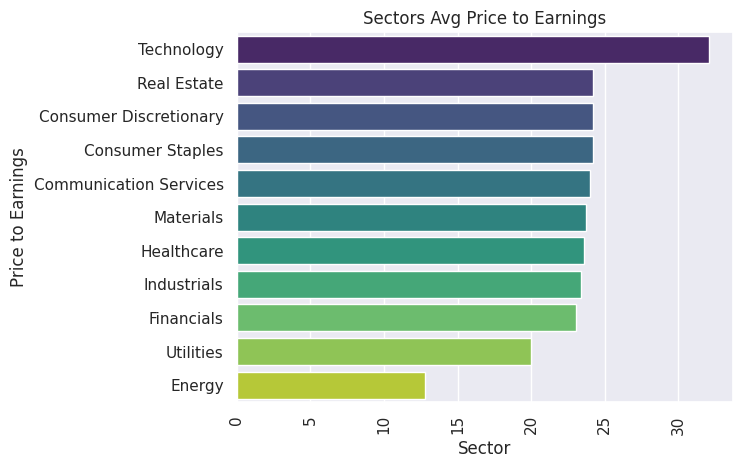

In [ ]:
sns.barplot(data= PE_Ratio_grouped_industries, x='PE Ratio',y='Sector',palette='viridis')

plt.xlabel('Sector')
plt.ylabel('Price to Earnings')
plt.title('Sectors Avg Price to Earnings')
plt.xticks(rotation=90)
plt.show()

## Which Sectors Have the Highest Average EPS?

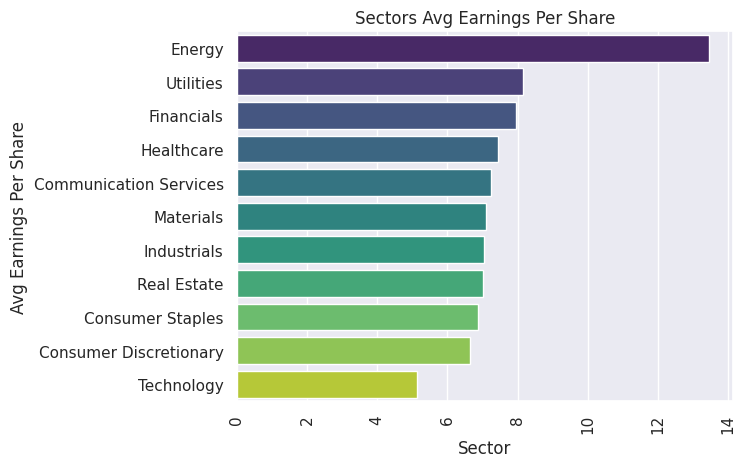

In [ ]:
sns.barplot(data= df_EPS_grouped_industries, y='Sector', x='EPS',palette='viridis')

plt.xlabel('Sector')
plt.ylabel('Avg Earnings Per Share')
plt.title('Sectors Avg Earnings Per Share')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1762 non-null   datetime64[ns]
 1   Ticker          1762 non-null   object        
 2   Open Price      1762 non-null   float64       
 3   Close Price     1762 non-null   float64       
 4   High Price      1762 non-null   float64       
 5   Low Price       1762 non-null   float64       
 6   Volume Traded   1762 non-null   int64         
 7   Market Cap      1762 non-null   float64       
 8   PE Ratio        1762 non-null   float64       
 9   Dividend Yield  1762 non-null   float64       
 10  EPS             1762 non-null   float64       
 11  52 Week High    1762 non-null   float64       
 12  52 Week Low     1762 non-null   float64       
 13  Sector          1762 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
m

In [ ]:
df_top_5_Tickers

Date Ticker  Open Price  Close Price  High Price  Low Price  \
683  2025-06-09    WGK      258.41       257.83      261.69     254.10   
1025 2025-06-13    PHM      292.65       292.95      295.73     288.84   
1303 2025-06-16  BRK.B      434.40       447.43      453.86     431.50   
1421 2025-06-18    HQZ      252.44       255.04      257.87     250.87   
1448 2025-06-18    QYG      231.47       234.51      238.82     230.72   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
683         4467482  5.836130e+09      8.29            1.30  31.10   
1025       13260732  2.862428e+10      9.68            2.85  30.26   
1303       53892654  1.744525e+11      8.27            1.74  54.10   
1421        9971309  1.705947e+10      8.72            1.37  29.25   
1448        7093356  5.822208e+10      8.02            1.82  29.24   

      52 Week High  52 Week Low  Sector  
683         319.04       173.30  Energy  
1025        315.15       226.08  Energy  
1303        571.57       345.53  Energy  
1421        334.40       224.53  Energy  
1448        254.92       198.60  Energy

In [35]:
df_Top_EPS = df.sort_values(['Sector','EPS'], ascending=[True, False])

In [36]:

# ✅ 1) Make sure you have the latest per ticker
df_latest = df_top_5_Tickers.sort_values('Date').groupby('Ticker').tail(1)

# ✅ 3) Melt it to long format
df_melted = df_latest.melt(
    id_vars=['Ticker'],
    value_vars=['EPS', 'PE Ratio', 'Dividend Yield', 'Market Cap'],
    var_name='Metric',
    value_name='Value'
)
print(df_melted)

   Ticker          Metric         Value
0     WGK             EPS  3.110000e+01
1     PHM             EPS  3.026000e+01
2   BRK.B             EPS  5.410000e+01
3     HQZ             EPS  2.925000e+01
4     QYG             EPS  2.924000e+01
5     WGK        PE Ratio  8.290000e+00
6     PHM        PE Ratio  9.680000e+00
7   BRK.B        PE Ratio  8.270000e+00
8     HQZ        PE Ratio  8.720000e+00
9     QYG        PE Ratio  8.020000e+00
10    WGK  Dividend Yield  1.300000e+00
11    PHM  Dividend Yield  2.850000e+00
12  BRK.B  Dividend Yield  1.740000e+00
13    HQZ  Dividend Yield  1.370000e+00
14    QYG  Dividend Yield  1.820000e+00
15    WGK      Market Cap  5.836130e+09
16    PHM      Market Cap  2.862428e+10
17  BRK.B      Market Cap  1.744525e+11
18    HQZ      Market Cap  1.705947e+10
19    QYG      Market Cap  5.822208e+10


## How Do Key Financial Metrics Compare Across the Top 5 Tickers?

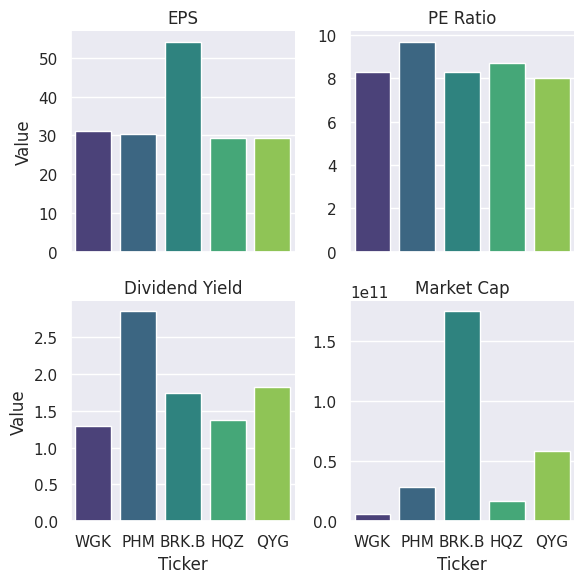

In [37]:

g = sns.FacetGrid(df_melted, col="Metric", col_wrap=2, sharey=False, height=3)
g.map_dataframe(sns.barplot, x="Ticker", y="Value", palette="viridis")
g.set_titles("{col_name}")
g.set_axis_labels("Ticker", "Value")
g.tight_layout()
plt.show()

In [ ]:
df_top_Tickers_Per_Sec = (
    df.sort_values(['Sector', 'EPS'], ascending=[True, False])
      .groupby('Sector', group_keys=False)
      .head(1)
)
df_top_Tickers_Per_Sec

Date Ticker  Open Price  Close Price  High Price  Low Price  \
1495 2025-06-19    YGJ      276.15       275.44      279.19     273.38   
61   2025-06-01    APJ      239.73       241.85      243.03     235.65   
917  2025-06-12    VMU      251.99       257.43      258.12     249.60   
1303 2025-06-16  BRK.B      434.40       447.43      453.86     431.50   
1128 2025-06-14    QRL      299.60       301.75      305.21     296.01   
159  2025-06-03    BQN      285.59       283.74      291.29     282.23   
956  2025-06-12    MVX      249.75       254.99      258.00     249.11   
478  2025-06-06    HDC      289.19       288.21      291.47     286.82   
1529 2025-06-19    FDB      280.85       283.25      286.10     278.36   
1651 2025-06-20    BDO      295.77       290.95      297.47     287.83   
1175 2025-06-15    YJI      298.09       293.06      300.63     288.01   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  \
1495       10661388  6.874668e+10     13.01            2.78  21.17   
61          9238933  4.056784e+10     12.31            0.76  19.65   
917         3835500  8.095982e+10     12.43            4.96  20.71   
1303       53892654  1.744525e+11      8.27            1.74  54.10   
1128        9264560  8.153291e+10     12.04            0.68  25.06   
159          546068  3.744807e+10     13.22            1.90  21.46   
956         2995445  7.749985e+09     12.14            2.16  21.00   
478        12214024  6.828925e+09     12.63            3.49  22.82   
1529        6154600  4.416926e+09     12.80            2.30  22.13   
1651       11448337  5.948713e+09     21.34            1.26  13.63   
1175        7522407  2.366150e+10     15.43            2.91  18.99   

      52 Week High  52 Week Low                  Sector  
1495        296.02       224.19  Communication Services  
61          274.67       228.31  Consumer Discretionary  
917         300.55       237.24        Consumer Staples  
1303        571.57       345.53                  Energy  
1128        376.80       201.12              Financials  
159         342.61       265.51              Healthcare  
956         271.56       168.05             Industrials  
478         335.21       194.82               Materials  
1529        320.25       196.75             Real Estate  
1651        364.96       244.29              Technology  
1175        309.35       217.93               Utilities

In [ ]:
df_lowest_Tickers_Per_Sec = (
    df.sort_values(['Sector', 'EPS'], ascending=[True, True])
      .groupby('Sector', group_keys=False)
      .head(1)
)
df_lowest_Tickers_Per_Sec

Date Ticker  Open Price  Close Price  High Price  Low Price  \
196  2025-06-03    UAP       15.87        16.33       16.38      15.80   
1679 2025-06-21    OES       17.25        16.92       17.56      16.64   
1014 2025-06-13    FXS       15.11        14.77       15.14      14.48   
1455 2025-06-18    RTR       15.65        15.40       15.69      15.32   
9    2025-06-01    DJF       16.36        16.10       16.40      15.98   
769  2025-06-10    LLS       15.02        15.05       15.12      14.96   
537  2025-06-07    QYS       16.56        16.21       16.87      15.99   
1094 2025-06-14    ACG       22.34        21.87       22.37      21.56   
1150 2025-06-14    ISB       26.58        26.69       26.74      26.32   
1197 2025-06-15    IVT       15.23        15.62       15.84      15.05   
236  2025-06-03    JNW       15.76        15.75       15.94      15.64   

      Volume Traded    Market Cap  PE Ratio  Dividend Yield   EPS  \
196        11820508  1.892547e+10     33.63            0.82  0.49   
1679       13174032  1.925798e+10     31.22            1.57  0.54   
1014        7825058  9.357145e+10     25.49            4.75  0.58   
1455        9081132  7.170657e+10     16.75            3.41  0.92   
9           3084579  1.017869e+10     24.28            0.68  0.66   
769         1008964  9.451440e+10     20.99            0.89  0.72   
537        14197974  7.462255e+10     23.21            0.70  0.70   
1094       13298307  6.774292e+10     34.84            0.79  0.63   
1150        1967618  6.901283e+09     34.79            4.24  0.77   
1197        5633299  8.665645e+10     33.21            0.47  0.47   
236         4078505  4.691264e+10     24.53            4.86  0.64   

      52 Week High  52 Week Low                  Sector  
196          19.26        15.23  Communication Services  
1679         18.70        11.37  Consumer Discretionary  
1014         18.46        10.66        Consumer Staples  
1455         20.54        10.58                  Energy  
9            21.28        15.22              Financials  
769          17.03        11.52              Healthcare  
537          17.98        10.73             Industrials  
1094         23.70        18.37               Materials  
1150         31.16        22.57             Real Estate  
1197         19.94        14.27              Technology  
236          19.77        13.91               Utilities

In [38]:
top3 = df.nlargest(3, 'EPS')

In [39]:
# ✅ 1) Make sure you have the latest per ticker
df_latest = df_top_Tickers_Per_Sec.sort_values('Date').groupby('Ticker').tail(1)

# ✅ 3) Melt it to long format
df_melted = df_latest.melt(
    id_vars=['Ticker'],
    value_vars=['EPS', 'PE Ratio', 'Dividend Yield', 'Market Cap'],
    var_name='Metric',
    value_name='Value'
)
print(df_melted)

   Ticker          Metric         Value
0     APJ             EPS  1.965000e+01
1     BQN             EPS  2.146000e+01
2     HDC             EPS  2.282000e+01
3     VMU             EPS  2.071000e+01
4     MVX             EPS  2.100000e+01
5     QRL             EPS  2.506000e+01
6     YJI             EPS  1.899000e+01
7   BRK.B             EPS  5.410000e+01
8     YGJ             EPS  2.117000e+01
9     FDB             EPS  2.213000e+01
10    BDO             EPS  1.363000e+01
11    APJ        PE Ratio  1.231000e+01
12    BQN        PE Ratio  1.322000e+01
13    HDC        PE Ratio  1.263000e+01
14    VMU        PE Ratio  1.243000e+01
15    MVX        PE Ratio  1.214000e+01
16    QRL        PE Ratio  1.204000e+01
17    YJI        PE Ratio  1.543000e+01
18  BRK.B        PE Ratio  8.270000e+00
19    YGJ        PE Ratio  1.301000e+01
20    FDB        PE Ratio  1.280000e+01
21    BDO        PE Ratio  2.134000e+01
22    APJ  Dividend Yield  7.600000e-01
23    BQN  Dividend Yield  1.900000e+00


## How Does the highest Market(Ticker) per Sector Perform Across Different Metrics?

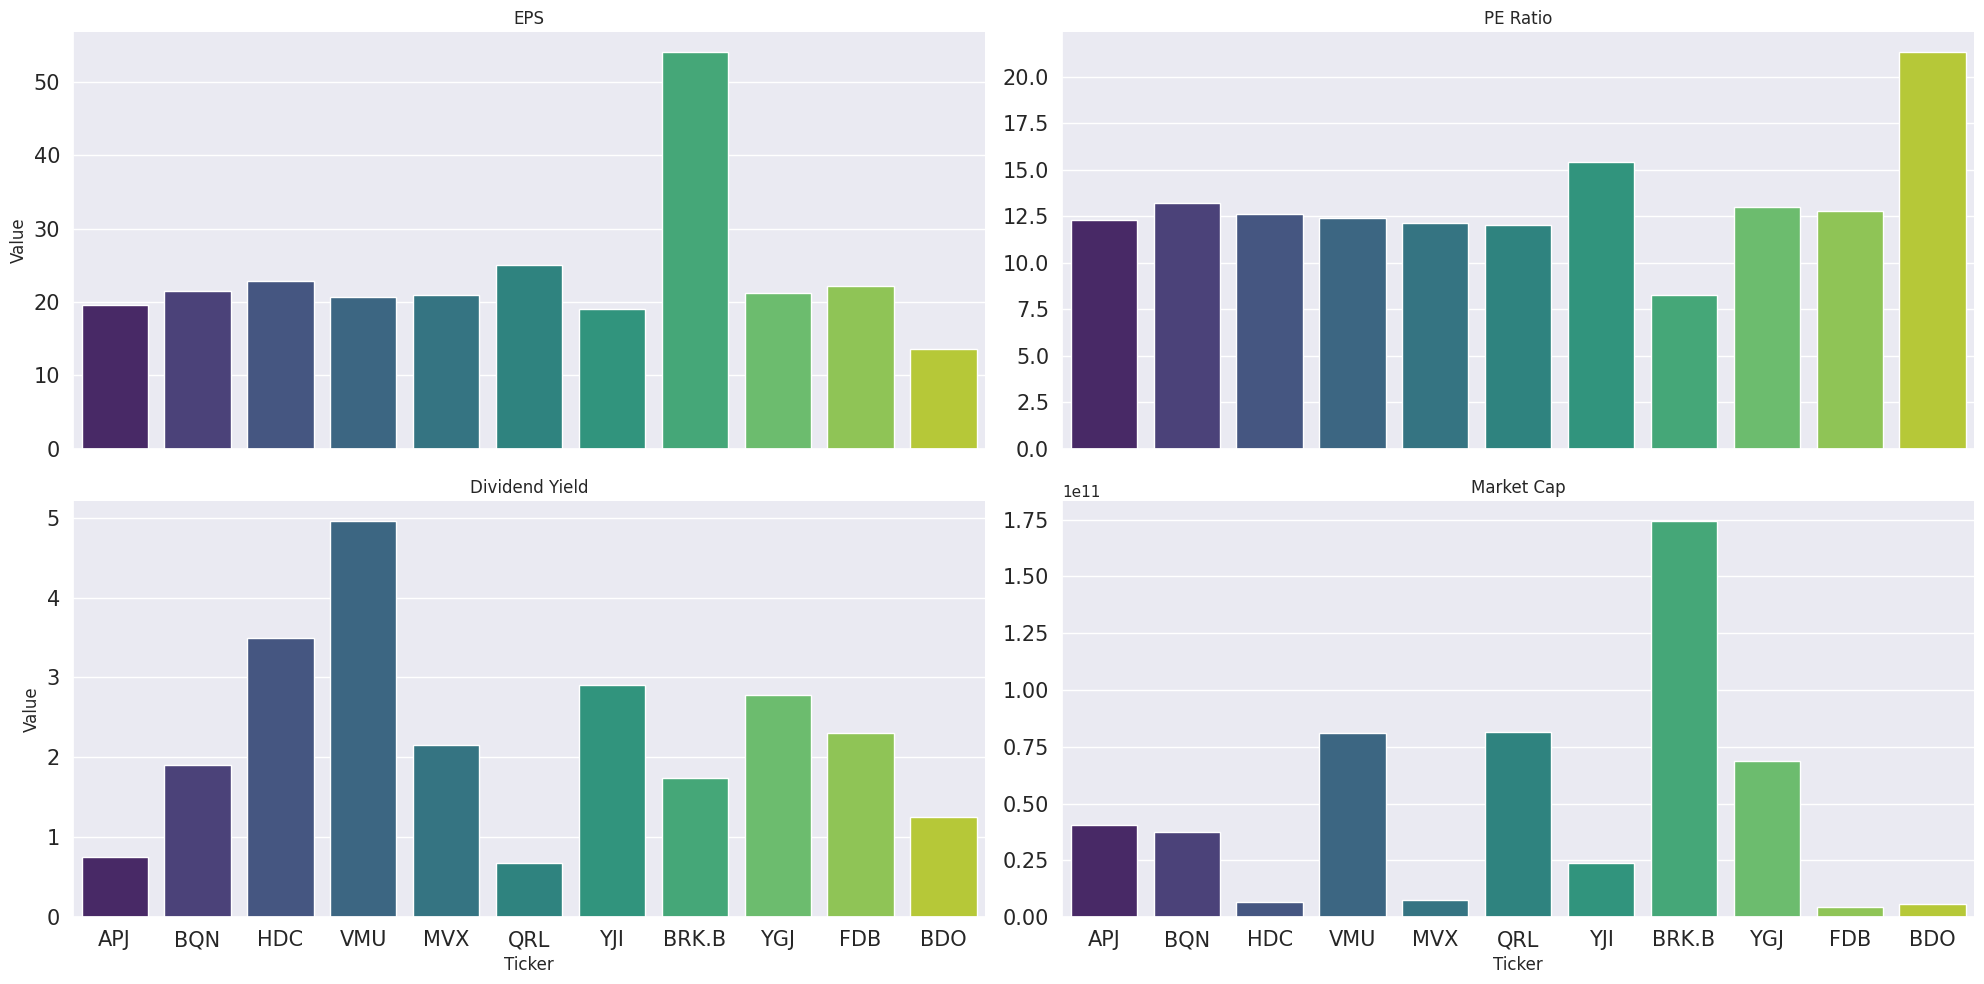

In [40]:
g = sns.FacetGrid(df_melted, col="Metric", col_wrap=2, sharey=False, height=5, aspect=2)
g.map_dataframe(sns.barplot, x="Ticker", y="Value", palette="viridis")
g.set_titles("{col_name}")
g.set_axis_labels("Ticker", "Value")

# Loop through axes to set xticks and yticks fontsize
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

g.tight_layout()
plt.show()


In [41]:
# ✅ 1) Make sure you have the latest per ticker
df_latest = df_lowest_Tickers_Per_Sec.sort_values('Date').groupby('Ticker').tail(1)

# ✅ 3) Melt it to long format
df_melted = df_latest.melt(
    id_vars=['Ticker'],
    value_vars=['EPS', 'PE Ratio', 'Dividend Yield', 'Market Cap'],
    var_name='Metric',
    value_name='Value'
)
print(df_melted)

   Ticker          Metric         Value
0     DJF             EPS  6.600000e-01
1     UAP             EPS  4.900000e-01
2     JNW             EPS  6.400000e-01
3     QYS             EPS  7.000000e-01
4     LLS             EPS  7.200000e-01
5     FXS             EPS  5.800000e-01
6     ACG             EPS  6.300000e-01
7     ISB             EPS  7.700000e-01
8     IVT             EPS  4.700000e-01
9     RTR             EPS  9.200000e-01
10    OES             EPS  5.400000e-01
11    DJF        PE Ratio  2.428000e+01
12    UAP        PE Ratio  3.363000e+01
13    JNW        PE Ratio  2.453000e+01
14    QYS        PE Ratio  2.321000e+01
15    LLS        PE Ratio  2.099000e+01
16    FXS        PE Ratio  2.549000e+01
17    ACG        PE Ratio  3.484000e+01
18    ISB        PE Ratio  3.479000e+01
19    IVT        PE Ratio  3.321000e+01
20    RTR        PE Ratio  1.675000e+01
21    OES        PE Ratio  3.122000e+01
22    DJF  Dividend Yield  6.800000e-01
23    UAP  Dividend Yield  8.200000e-01


## How Does the lowest Market(Ticker) per Sector Perform Across Different Metrics?

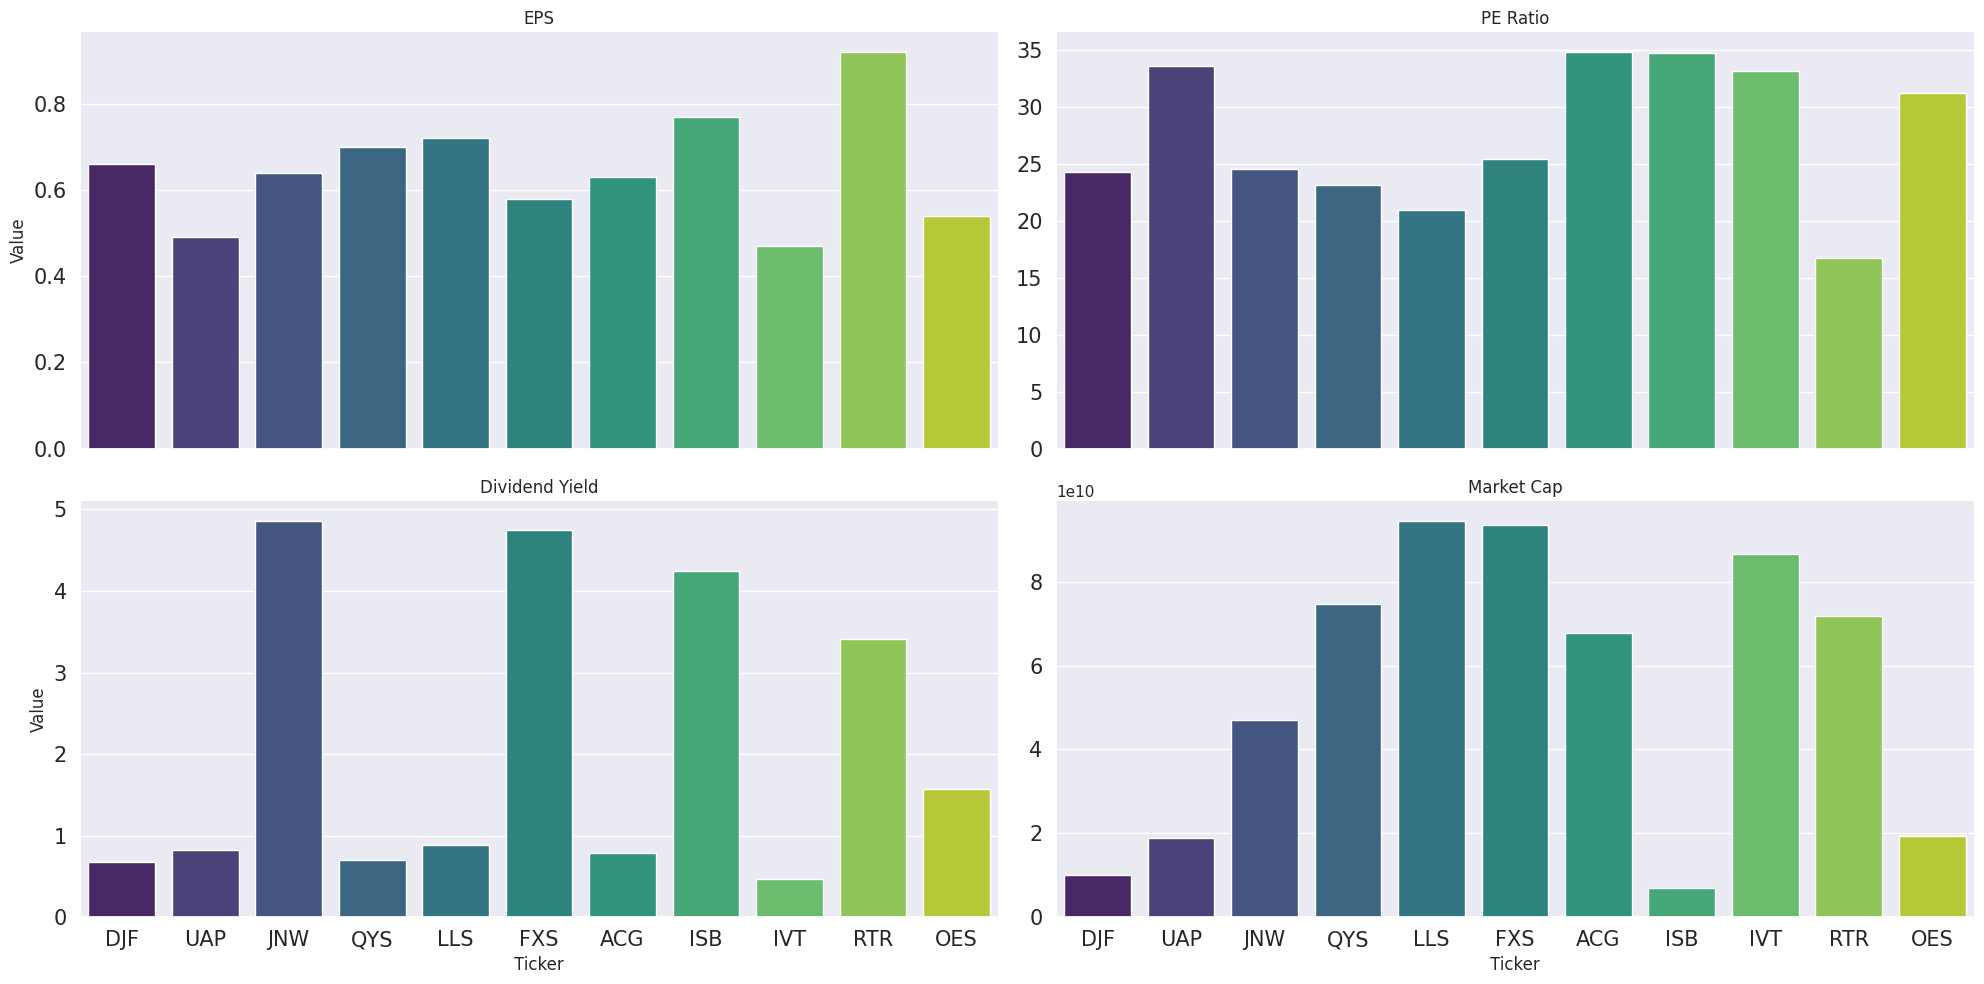

In [42]:
g = sns.FacetGrid(df_melted, col="Metric", col_wrap=2, sharey=False, height=5, aspect=2)
g.map_dataframe(sns.barplot, x="Ticker", y="Value", palette="viridis")
g.set_titles("{col_name}")
g.set_axis_labels("Ticker", "Value")

# Loop through axes to set xticks and yticks fontsize
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

g.tight_layout()
plt.show()

## How Are Key Financial Metrics Correlated?

Correlation Matrix:
                     EPS  PE Ratio  Dividend Yield  Market Cap
EPS             1.000000 -0.628297        0.344097    0.069784
PE Ratio       -0.628297  1.000000       -0.197361   -0.400171
Dividend Yield  0.344097 -0.197361        1.000000   -0.025520
Market Cap      0.069784 -0.400171       -0.025520    1.000000


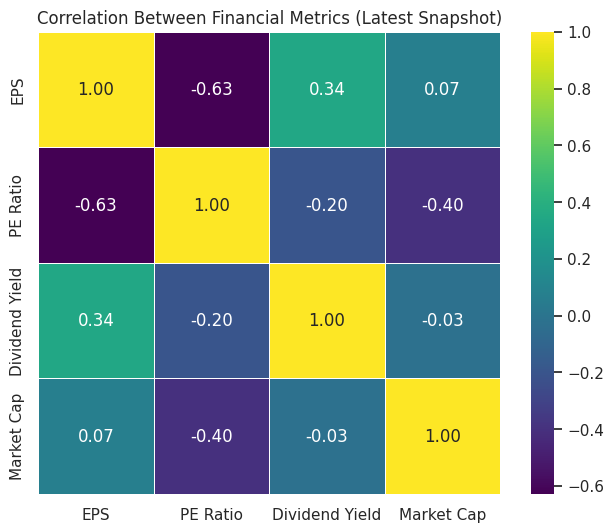

In [43]:
# 2️⃣ Ensure numeric
cols = ['EPS', 'PE Ratio', 'Dividend Yield', 'Market Cap']
df_latest[cols] = df_latest[cols].apply(pd.to_numeric, errors='coerce')

# 3️⃣ Compute the correlation matrix
corr = df_latest[cols].corr()

print("Correlation Matrix:")
print(corr)

# 4️⃣ Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Between Financial Metrics (Latest Snapshot)')
plt.show()


In [44]:
df.head()

Date Ticker  Open Price  Close Price  High Price  Low Price  \
0 2025-06-01    SLH       34.92        34.53       35.22      34.38   
1 2025-06-01    WGB      206.50       208.45      210.51     205.12   
2 2025-06-01    ZIN      125.10       124.03      127.40     121.77   
3 2025-06-01    YPY      260.55       265.28      269.99     256.64   
4 2025-06-01    VKD      182.43       186.89      189.40     179.02   

   Volume Traded    Market Cap  PE Ratio  Dividend Yield    EPS  52 Week High  \
0        2966611  5.738136e+10     29.63            2.85   1.17         39.39   
1        1658738  5.274707e+10     13.03            2.73  16.00        227.38   
2       10709898  5.596949e+10     29.19            2.64   4.25        138.35   
3       14012358  7.964089e+10     19.92            1.29  13.32        317.57   
4       14758143  7.271437e+10     40.18            1.17   4.65        243.54   

   52 Week Low       Sector  
0        28.44  Industrials  
1       136.79       Energy  
2       100.69   Healthcare  
3       178.26  Industrials  
4       165.53   Technology

In [ ]:
df_top_Tickers_Per_Sec

## How Do Sectors Compare in EPS and P/E Ratio

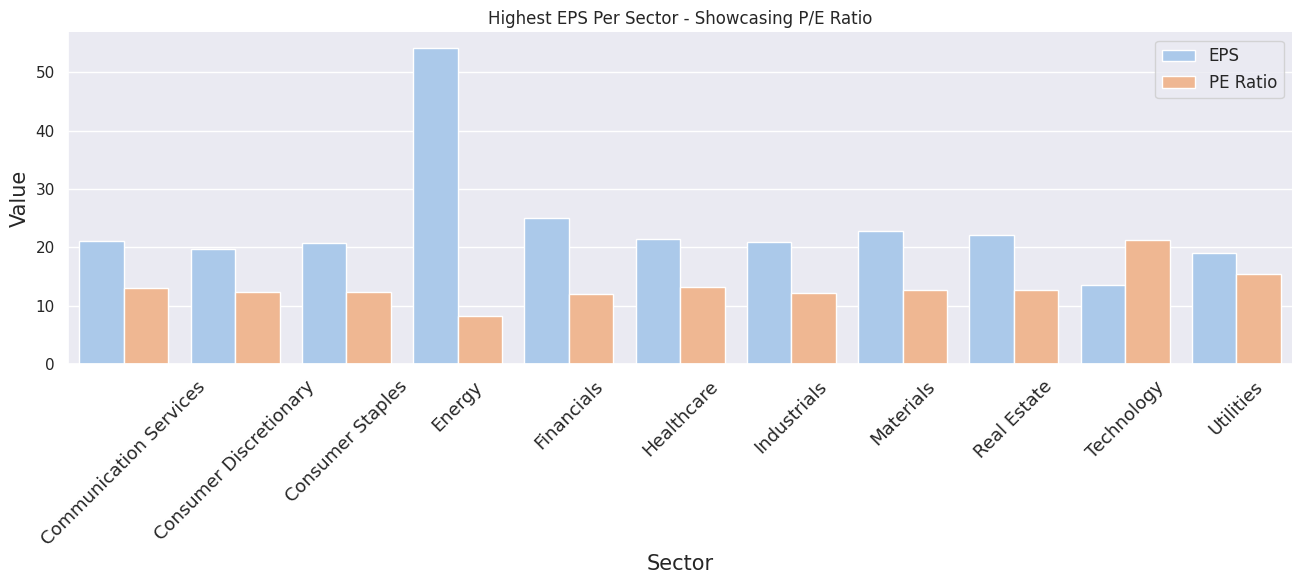

In [45]:

df_melted2 = df_top_Tickers_Per_Sec.melt(
    id_vars=['Ticker', 'Sector'],
    value_vars=['EPS', 'PE Ratio'],
    var_name='Metric',
    value_name='Value'
)

g= sns.catplot(
    data=df_melted2,
    x='Sector',
    y='Value',
    hue='Metric',
    kind='bar',
    height=6,
    aspect=2,
    palette='pastel'
)
g._legend.remove()

plt.title('Highest EPS Per Sector - Showcasing P/E Ratio')
plt.xticks(rotation=45,fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Sector',fontsize=15)
plt.ylabel('Value',fontsize=15)

plt.tight_layout()
plt.show()

## How Many Markets (Tickers) Are There in Each Sector?

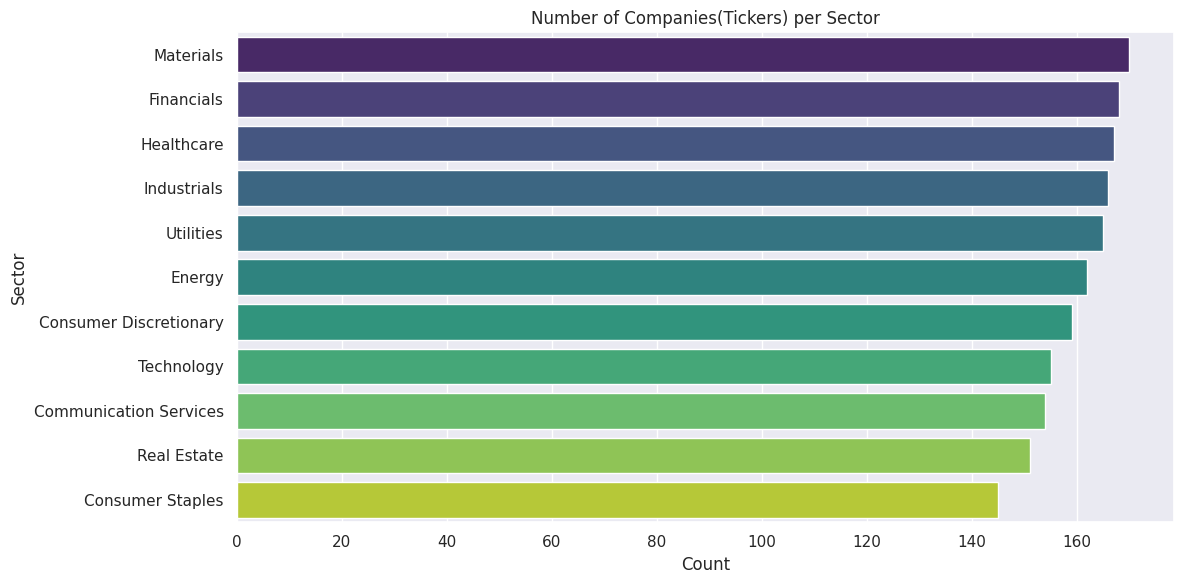

In [47]:

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Sector', order=df['Sector'].value_counts().index, palette='viridis')
plt.title('Number of Companies(Tickers) per Sector')
plt.xlabel('Count')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()


In [48]:
# Sort by Sector & EPS descending
df_sorted = df.sort_values(['Sector', 'EPS'], ascending=[True, False])

# Group by Sector, pick top 5
top5 = df_sorted.groupby('Sector').head(5)

# Verify
print(top5.groupby('Sector')['Ticker'].unique())


Sector
Communication Services      [YGJ, PLF, CEA, KDQ, INX]
Consumer Discretionary      [APJ, WQQ, UGI, ZUS, YZT]
Consumer Staples            [VMU, VLH, HZX, CGC, QIJ]
Energy                    [BRK.B, WGK, PHM, HQZ, QYG]
Financials                  [QRL, PTL, BDY, AMM, GFS]
Healthcare                  [BQN, BIL, UQP, DGO, UIL]
Industrials                 [MVX, EEE, CVZ, BMK, GQL]
Materials                   [HDC, CFH, DAY, SWW, CBW]
Real Estate                 [FDB, HZM, KYI, SYY, OGE]
Technology                  [BDO, SUK, MHV, TLC, ARV]
Utilities                   [YJI, HCL, YQR, BRS, ARE]
Name: Ticker, dtype: object


## Top 3 Markets (tickers) by EPS & Volume Traded for all Sectors

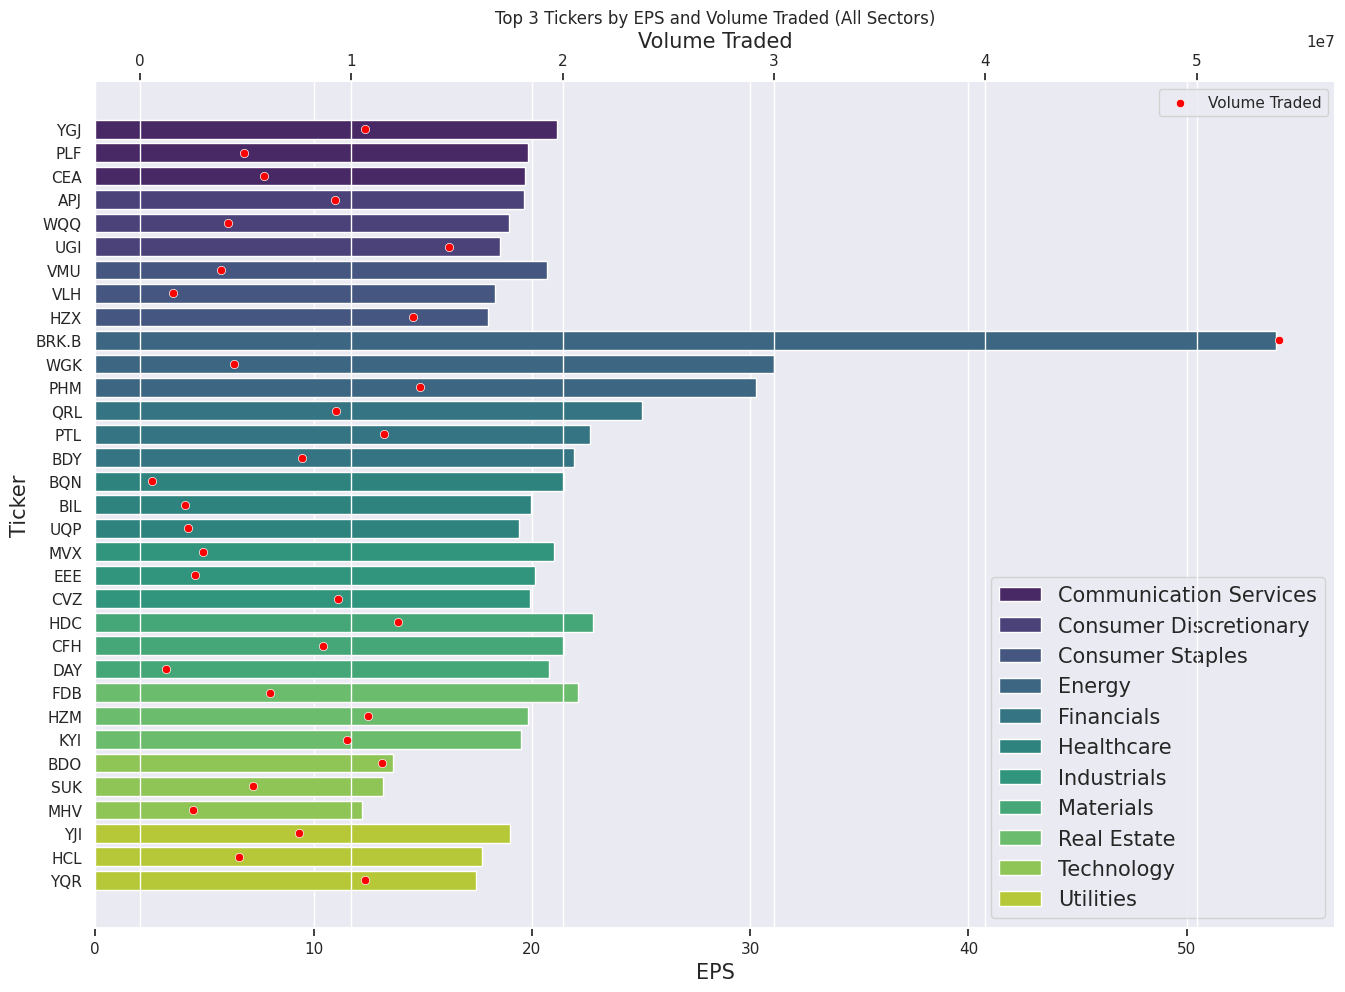

In [49]:

top3 = df.groupby('Sector').apply(lambda x: x.nlargest(3, 'EPS'))

fig, ax1 = plt.subplots(figsize=(16, 11))

# Plot EPS on left y-axis
sns.barplot(data=top3, y='Ticker', x='EPS', hue='Sector', dodge=False, palette='viridis', ax=ax1)
ax1.set_xlabel('EPS', fontsize=15)
ax1.set_ylabel('Ticker', fontsize=15)
ax1.legend(loc='lower right', fontsize=15)

# Plot Volume on right y-axis
ax2 = ax1.twiny()
sns.scatterplot(data=top3, y='Ticker', x='Volume Traded', color='red', ax=ax2, label='Volume Traded')
ax2.set_xlabel('Volume Traded', fontsize=15)

plt.title('Top 3 Tickers by EPS and Volume Traded (All Sectors)')
plt.show()


# Thank You!